In [110]:
# We will include captions all along the way
# Import required modules
import pandas as pd
import matplotlib.pyplot as plt

#Obtain datasets from file
fhfa = pd.read_csv("Databases/fhfa_hpi.csv")
laus = pd.read_csv("Databases/laus.csv")
real_estate = pd.read_csv("Databases/kaggle_real_estate.csv")

### Cleaning Data ###


In [111]:
#Intial Processing of HPI
df_hpi = fhfa.copy()

#Rename Columns
df_hpi.rename(columns={"place_name":"region",
                       "yr":"year",
                       "period" : "month"},
                       inplace=True)

#Inspect the null values
display(df_hpi.isnull().sum())
display(df_hpi[df_hpi.index_sa.isnull()])

#Drop those null values as they dont make a very big impact on the data
df_hpi = df_hpi.dropna()

#Create a date column using month and year and then drop month and year
df_hpi["date"] = pd.to_datetime(df_hpi['year']*100 + df_hpi['month'], format='%Y%m').dt.to_period("M")
df_hpi.drop(columns=["year", "month"], inplace=True)
df_hpi.drop_duplicates(keep='first', inplace=True)

display(df_hpi['index_sa'].dtype)

hpi_type          0
hpi_flavor        0
frequency         0
level             0
region            0
place_id          0
year              0
month             0
index_nsa         0
index_sa      88320
dtype: int64

,hpi_type,hpi_flavor,frequency,level,region,place_id,year,month,index_nsa,index_sa
4170,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1986,2,108.06,NaN
4171,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1986,3,108.28,NaN
4172,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1986,4,94.80,NaN
4173,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1987,1,101.63,NaN
4174,traditional,all-transactions,quarterly,MSA,"Abilene, TX",10180,1987,2,100.89,NaN
...,...,...,...,...,...,...,...,...,...,...
132239,developmental,all-transactions,quarterly,Puerto Rico,Puerto Rico,PR,2024,3,249.92,NaN
132240,developmental,all-transactions,quarterly,Puerto Rico,Puerto Rico,PR,2024,4,250.97,NaN
132241,developmental,all-transactions,quarterly,Puerto Rico,Puerto Rico,PR,2025,1,247.17,NaN
132242,developmental,all-transactions,quarterly,Puerto Rico,Puerto Rico,PR,2025,2,252.11,NaN


dtype('float64')

In [112]:
#Initial Processing of LAUS
df_laus = laus.copy()
df_laus.head(5)

df_laus.rename(columns={"Area Name": "region",
                        "Area Type": "area_type",
                        "Year": "year",
                        "Month": "month",
                        "Date_Numeric": "date",
                        "Seasonally Adjusted(Y/N)":"seasonally_adjusted",
                        "Status": "status",
                        "Labor Force": "labor_force",
                        "Employment": "employed",
                        "Unemployment": "unemployed",
                        "Unemployment Rate" : "unemployment_rate",
                        "Benchmark" : "benchmark"},
                        inplace=True)
df_laus['date'] = pd.to_datetime(df_laus['date'], format='%m/%Y').dt.to_period("M")
df_laus = df_laus[df_laus['status'] == "Final"]
df_laus.drop(columns=["year","month", "benchmark", 'status'], inplace=True)
df_laus.drop_duplicates(keep='first',inplace=True)
display(df_laus)

,region,area_type,date,seasonally_adjusted,labor_force,employed,unemployed,unemployment_rate
0,California,State,1976-01,N,9672362,8668016,1004346,10.4
1,California,State,1976-01,Y,9774280,8875685,898595,9.2
2,California,State,1976-02,N,9684440,8704564,979876,10.1
3,California,State,1976-02,Y,9768885,8871553,897332,9.2
4,California,State,1976-03,N,9689626,8776344,913282,9.4
...,...,...,...,...,...,...,...,...
215038,Visalia MSA,Metropolitan Area,2025-07,N,220700,195800,24900,11.3
215039,Tulare County,County,2025-07,N,220700,195800,24900,11.3
215042,Yolo County,County,2025-07,N,113600,106400,7200,6.3
215044,Yuba City MSA,Metropolitan Area,2025-07,N,83700,76900,6800,8.1


In [113]:
#Housing value initial processing
df_real_estate = real_estate.copy()

#Rename the columns for easier processing
df_real_estate.rename(columns={"RegionID": "region_id",
                               "SizeRank" : "size_rank",
                               "RegionName" : "region",
                               "StateName" : "state"},
                               inplace=True)

#undo the pivot on the home value
df_real_estate_home_value = df_real_estate.copy()
df_real_estate_home_value.rename(columns={"2018-02-HomeValue" : "2018-02",
                               "2018-03-HomeValue" : "2018-03",
                               "2024-03-HomeValue" : "2024-03",
                               "2024-04-HomeValue" : "2024-04",
                               "2024-05-HomeValue" : "2024-05"},
                               inplace=True)
df_real_estate_home_value = pd.melt(df_real_estate_home_value, id_vars=['region_id', 'size_rank', 'region', 'state'], value_vars=['2018-02','2018-03','2024-03','2024-04','2024-05'], var_name='date', value_name='home_value')
display(df_real_estate_home_value)

#undo the pivot on the DaysPending value
df_real_estate_days_pending = df_real_estate.copy()
df_real_estate_days_pending.rename(columns={"2018-02-DaysPending" : "2018-02",
                               "2018-03-DaysPending" : "2018-03",
                               "2024-03-DaysPending" : "2024-03",
                               "2024-04-DaysPending" : "2024-04",
                               "2024-05-DaysPending" : "2024-05"},
                               inplace=True)
df_real_estate_days_pending = pd.melt(df_real_estate_days_pending, id_vars=['region_id', 'size_rank', 'region', 'state'], value_vars=['2018-02','2018-03','2024-03','2024-04','2024-05'], var_name='date', value_name='days_pending')
display(df_real_estate_days_pending)

#undo the pivot on the cut_raw value
df_real_estate_cut_raw = df_real_estate.copy()
df_real_estate_cut_raw.rename(columns={"2018-02-CutRaw" : "2018-02",
                               "2018-03-CutRaw" : "2018-03",
                               "2024-03-CutRaw" : "2024-03",
                               "2024-04-CutRaw" : "2024-04",
                               "2024-05-CutRaw" : "2024-05"},
                               inplace=True)
df_real_estate_cut_raw = pd.melt(df_real_estate_cut_raw, id_vars=['region_id', 'size_rank', 'region', 'state'], value_vars=['2018-02','2018-03','2024-03','2024-04','2024-05'], var_name='date', value_name='cut_raw')
display(df_real_estate_cut_raw)

df_real_estate = pd.merge(df_real_estate_home_value, df_real_estate_days_pending, how='inner', on=['date','region_id','size_rank','region','state'])
df_real_estate = pd.merge(df_real_estate, df_real_estate_cut_raw, how='left', on=['date','region_id','size_rank','region','state'])
df_real_estate.dropna(inplace=True)
df_real_estate['date'] = pd.to_datetime(df_real_estate['date'], format='%Y-%m').dt.to_period("M")
df_real_estate['days_pending'] = df_real_estate['days_pending'].astype(int)
df_real_estate['cut_raw'] = df_real_estate['cut_raw'].astype(int)
df_real_estate['home_value'] = df_real_estate['home_value'].round(2)
df_real_estate.drop_duplicates(keep='first', inplace=True)
df_real_estate.state.fillna("Unknown", inplace=True)
df_real_estate[df_real_estate['state'] == 'Unknown']
df_real_estate

,region_id,size_rank,region,state,date,home_value
0,102001,0,United States,NaN,2018-02,225746.614318
1,394913,1,"New York, NY",NY,2018-02,468313.430126
2,753899,2,"Los Angeles, CA",CA,2018-02,629019.165765
3,394463,3,"Chicago, IL",IL,2018-02,229741.266973
4,394514,4,"Dallas, TX",TX,2018-02,241533.231800
...,...,...,...,...,...,...
4470,753929,935,"Zapata, TX",TX,2024-05,119697.355634
4471,394743,936,"Ketchikan, AK",AK,2024-05,389962.681122
4472,753874,937,"Craig, CO",CO,2024-05,287028.957463
4473,395188,938,"Vernon, TX",TX,2024-05,92149.470030


,region_id,size_rank,region,state,date,days_pending
0,102001,0,United States,NaN,2018-02,52.0
1,394913,1,"New York, NY",NY,2018-02,68.0
2,753899,2,"Los Angeles, CA",CA,2018-02,33.0
3,394463,3,"Chicago, IL",IL,2018-02,52.0
4,394514,4,"Dallas, TX",TX,2018-02,46.0
...,...,...,...,...,...,...
4470,753929,935,"Zapata, TX",TX,2024-05,NaN
4471,394743,936,"Ketchikan, AK",AK,2024-05,NaN
4472,753874,937,"Craig, CO",CO,2024-05,NaN
4473,395188,938,"Vernon, TX",TX,2024-05,NaN


,region_id,size_rank,region,state,date,cut_raw
0,102001,0,United States,NaN,2018-02,7600.0
1,394913,1,"New York, NY",NY,2018-02,16000.0
2,753899,2,"Los Angeles, CA",CA,2018-02,20000.0
3,394463,3,"Chicago, IL",IL,2018-02,8000.0
4,394514,4,"Dallas, TX",TX,2018-02,8562.0
...,...,...,...,...,...,...
4470,753929,935,"Zapata, TX",TX,2024-05,NaN
4471,394743,936,"Ketchikan, AK",AK,2024-05,NaN
4472,753874,937,"Craig, CO",CO,2024-05,NaN
4473,395188,938,"Vernon, TX",TX,2024-05,NaN


,region_id,size_rank,region,state,date,home_value,days_pending,cut_raw
1,394913,1,"New York, NY",NY,2018-02,468313.43,68,16000
2,753899,2,"Los Angeles, CA",CA,2018-02,629019.17,33,20000
3,394463,3,"Chicago, IL",IL,2018-02,229741.27,52,8000
4,394514,4,"Dallas, TX",TX,2018-02,241533.23,46,8562
5,394692,5,"Houston, TX",TX,2018-02,208651.87,51,10000
...,...,...,...,...,...,...,...,...
4412,753921,867,"Steamboat Springs, CO",CO,2024-05,1081041.22,32,40000
4416,395236,871,"Woodward, OK",OK,2024-05,123133.36,73,5500
4417,395004,872,"Prineville, OR",OR,2024-05,461247.62,59,10900
4442,394403,899,"Borger, TX",TX,2024-05,101062.89,65,5050


### Initial Subsetting of Data

#### Main Subset

In [114]:
#As our project is analyzing california, we must first subset the data by region
df_hpi_ca = df_hpi[df_hpi['region'] == 'California']
df_hpi_ca.rename(columns={'place_id': 'state'}, inplace=True)
df_hpi_ca.drop(columns=['hpi_type','hpi_flavor'], inplace=True)
display(df_hpi_ca)

#We then filter our laus by state and county for different levels of analysis
#First we filter for only seasonally adjusted data
df_laus_new = df_laus[df_laus['seasonally_adjusted'] == 'Y']
df_laus_new.drop(columns='seasonally_adjusted', inplace=True)

#State
df_laus_state = df_laus_new[(df_laus_new['area_type'] == 'State') & (df_laus_new['region'] == 'California')]
df_laus_state.drop(columns=['area_type'], inplace=True)

#County
df_laus_county = df_laus_new[(df_laus_new['area_type'] == 'County')]
df_laus_county.drop(columns=['area_type'], inplace=True)
df_laus_county['region'] = df_laus_county['region'].str[:-7]
df_laus_county.rename(columns={'region': 'county'}, inplace=True)
display(df_laus_county)

#We the filter the real estate dataset to be by state
df_real_estate_ca = df_real_estate[df_real_estate.state == 'CA']

#Clean up the region now that it is all in CA and rename to county
df_real_estate_ca['region'] = df_real_estate_ca['region'].str[:-4]
df_real_estate_ca.rename(columns={'region' : 'county'}, inplace=True)

display(df_real_estate_ca)

C:\Users\zimin\AppData\Local\Temp\ipykernel_69248\2638941300.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hpi_ca.rename(columns={'place_id': 'state'}, inplace=True)
C:\Users\zimin\AppData\Local\Temp\ipykernel_69248\2638941300.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hpi_ca.drop(columns=['hpi_type','hpi_flavor'], inplace=True)


,frequency,level,region,state,index_nsa,index_sa,date
93887,quarterly,State,California,CA,100.00,100.00,1991-01
93888,quarterly,State,California,CA,100.63,99.93,1991-02
93889,quarterly,State,California,CA,101.26,100.18,1991-03
93890,quarterly,State,California,CA,101.00,100.36,1991-04
93891,quarterly,State,California,CA,99.79,99.81,1992-01
...,...,...,...,...,...,...,...
116400,quarterly,State,California,CA,423.41,421.21,2024-03
116401,quarterly,State,California,CA,421.42,423.54,2024-04
116402,quarterly,State,California,CA,425.40,424.58,2025-01
116403,quarterly,State,California,CA,426.84,420.05,2025-02


C:\Users\zimin\AppData\Local\Temp\ipykernel_69248\2638941300.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_laus_new.drop(columns='seasonally_adjusted', inplace=True)
C:\Users\zimin\AppData\Local\Temp\ipykernel_69248\2638941300.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_laus_state.drop(columns=['area_type'], inplace=True)
C:\Users\zimin\AppData\Local\Temp\ipykernel_69248\2638941300.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

,county,date,labor_force,employed,unemployed,unemployment_rate
25,Los Angeles,1976-01,3381856,3081806,300050,8.9
27,Los Angeles,1976-02,3381218,3081497,299721,8.9
29,Los Angeles,1976-03,3381679,3083346,298333,8.8
31,Los Angeles,1976-04,3385126,3089190,295936,8.7
33,Los Angeles,1976-05,3389808,3095552,294256,8.7
...,...,...,...,...,...,...
209868,Los Angeles,2025-03,5077300,4777600,299800,5.9
210892,Los Angeles,2025-04,5071400,4775000,296300,5.8
211916,Los Angeles,2025-05,5072700,4779100,293600,5.8
212940,Los Angeles,2025-06,5071600,4780000,291600,5.7


C:\Users\zimin\AppData\Local\Temp\ipykernel_69248\2638941300.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_estate_ca['region'] = df_real_estate_ca['region'].str[:-4]
C:\Users\zimin\AppData\Local\Temp\ipykernel_69248\2638941300.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real_estate_ca.rename(columns={'region' : 'county'}, inplace=True)


,region_id,size_rank,county,state,date,home_value,days_pending,cut_raw
2,753899,2,Los Angeles,CA,2018-02,629019.17,33,20000
12,395057,12,San Francisco,CA,2018-02,915915.83,21,39000
13,395025,13,Riverside,CA,2018-02,358288.52,41,10000
17,395056,17,San Diego,CA,2018-02,586462.81,33,15000
26,395045,26,Sacramento,CA,2018-02,407847.53,31,10000
...,...,...,...,...,...,...,...,...
3984,395175,416,Ukiah,CA,2024-05,503534.87,60,25750
4057,394472,492,Clearlake,CA,2024-05,322270.76,84,15000
4071,395016,506,Red Bluff,CA,2024-05,320211.90,55,10000
4132,753920,569,Sonora,CA,2024-05,401768.95,52,15000


### Data Merging

In [ ]:
#We merge the unemployment and hpi by date and region
df_main_state = pd.merge(df_hpi_ca, df_laus_state, how='inner', on=['date','region'])
df_main_state.drop(columns=['level'], inplace=True)
display(df_main_state)

#We merge all three sets by merging laus and real_estate by county and then merge hpi by state and date
df_main_county = pd.merge(df_laus_county, df_real_estate_ca, how='inner', on=['date', 'county'])
df_main_county = pd.merge(df_main_county, df_hpi_ca, how='inner', on=['date','state'])
df_main_county


,frequency,region,state,index_nsa,index_sa,date,labor_force,employed,unemployed,unemployment_rate
0,quarterly,California,CA,100.00,100.00,1991-01,15121000,14038500,1082600,7.2
1,quarterly,California,CA,100.63,99.93,1991-02,15121300,14003800,1117600,7.4
2,quarterly,California,CA,101.26,100.18,1991-03,15121500,13975300,1146200,7.6
3,quarterly,California,CA,101.00,100.36,1991-04,15119600,13953300,1166300,7.7
4,quarterly,California,CA,99.79,99.81,1992-01,15210800,13904800,1306000,8.6
...,...,...,...,...,...,...,...,...,...,...
273,quarterly,California,CA,423.41,421.21,2024-03,19571600,18567500,1004100,5.1
274,quarterly,California,CA,421.42,423.54,2024-04,19593700,18580500,1013200,5.2
275,quarterly,California,CA,425.40,424.58,2025-01,19704100,18634800,1069200,5.4
276,quarterly,California,CA,426.84,420.05,2025-02,19706200,18645000,1061200,5.4


,county,date,labor_force,employed,unemployed,unemployment_rate,region_id,size_rank,state,home_value,days_pending,cut_raw,frequency,level,region,index_nsa,index_sa
0,Los Angeles,2018-02,5120800,4882200,238600,4.7,753899,2,CA,629019.17,33,20000,quarterly,State,California,278.26,275.17
1,Los Angeles,2018-02,5120800,4882200,238600,4.7,753899,2,CA,629019.17,33,20000,quarterly,State,California,276.41,273.15
2,Los Angeles,2018-03,5126300,4888100,238200,4.6,753899,2,CA,636850.14,31,20000,quarterly,State,California,281.36,278.41
3,Los Angeles,2018-03,5126300,4888100,238200,4.6,753899,2,CA,636850.14,31,20000,quarterly,State,California,278.95,276.64
4,Los Angeles,2024-03,5083600,4805700,277900,5.5,753899,2,CA,952665.58,32,34000,quarterly,State,California,427.14,423.58
5,Los Angeles,2024-03,5083600,4805700,277900,5.5,753899,2,CA,952665.58,32,34000,quarterly,State,California,423.41,421.21
6,Los Angeles,2024-04,5093400,4809700,283800,5.6,753899,2,CA,956266.69,29,40012,quarterly,State,California,429.31,429.57
7,Los Angeles,2024-04,5093400,4809700,283800,5.6,753899,2,CA,956266.69,29,40012,quarterly,State,California,421.42,423.54


### Subsets

In [137]:
#Main State HPI vs UE
df_hpi_ue_main = df_main_state[['date', 'index_sa', 'unemployment_rate']]
df_hpi_ue_main.drop_duplicates('date', keep='first',inplace=True)

C:\Users\zimin\AppData\Local\Temp\ipykernel_69248\3893035838.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hpi_ue_main.drop_duplicates('date', keep='first',inplace=True)


In [147]:
#HPI vs UE with pct_change
df_hpi_ue_pct = df_hpi_ue_main.copy()
df_hpi_ue_pct['hpi_change'] = df_hpi_ue_pct['index_sa'].pct_change()

### Visualizations

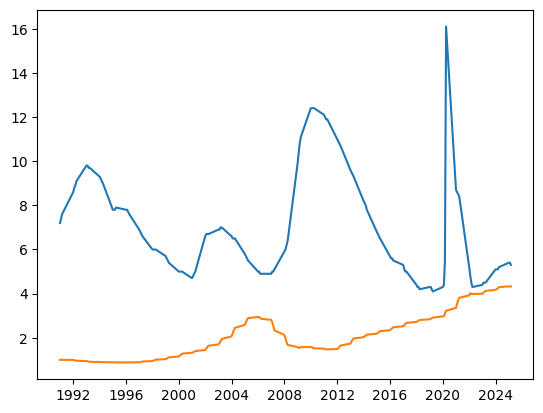

In [151]:
fig, ax = plt.subplots()
#df_hpi_ue_main.drop_duplicates('date', inplace=True)
df_hpi_ue_main.sort_values('date')
#df_hpi_ue_main['date'] = df_hpi_ue_main['date'].dt.to_timestamp()
ax.plot(df_hpi_ue_main['date'], df_hpi_ue_main['unemployment_rate'])
ax.plot(df_hpi_ue_main['date'], df_hpi_ue_main['index_sa']/100)